# Clustering - Cereals Dataset

**Pandas** is a Python library that is used for faster data analysis, data cleaning, and data pre-processing. 
Pandas is built on top of the numerical library of Python, called numpy.

**NumPy** is an open-source numerical Python library. NumPy contains a multi-dimensional array and matrix data structures. 
It can be utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical, and 
algebraic routines.

In [1]:
# Loading required libraries
import pandas as pd
import numpy as np

##### Dataset Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

### Reading data

In [2]:
cereals = pd.read_csv("C:/Users/kunal95/Documents/Clustering/Cereals.csv")
cereals

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [3]:
# Check the data type of each attribute
cereals.dtypes

name         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [4]:
# Check the shape (rows and columns)
cereals.shape

(77, 14)

In [5]:
cereals.head(4)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912


### Aggregating "name", "shelf" and "rating" to make labels

In [6]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'],axis=1,inplace=True)

In [7]:
# Check the shape after dropping few columns
cereals.shape

(77, 12)

# Data Exploration

In [8]:
# Display top 5 rows
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)


In [9]:
# Display count of levels
cereals.label.value_counts()

Corn_Pops (2 - 35.78)              1
Cheerios (1 - 50.76)               1
Cap'n'Crunch (2 - 18.04)           1
Wheaties_Honey_Gold (1 - 36.19)    1
Double_Chex (3 - 44.33)            1
                                  ..
Honey-comb (1 - 28.74)             1
Lucky_Charms (2 - 26.73)           1
Frosted_Mini-Wheats (2 - 58.35)    1
Count_Chocula (2 - 22.4)           1
All-Bran (3 - 59.43)               1
Name: label, Length: 77, dtype: int64

### Check summary statistics

In [10]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


### Decouple label from the features

In [11]:
cereal_label = cereals['label']

## Select all columns except "label"

cereals.drop('label', axis=1,inplace = True)

### Check missing values

In [12]:
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

### Imputation

In [13]:
# Fit the imputer on X.
# Impute all missing values in X.
from sklearn.preprocessing import Imputer

mean_imputer = Imputer(strategy = 'mean')
imputed_cereals = pd.DataFrame(mean_imputer.fit_transform(cereals),columns = cereals.columns)

C:\Users\kunal95\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# Display top 5 rows
imputed_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75


### Checking for NAs again

In [15]:
imputed_cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

### Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(imputed_cereals)

std_X = standardizer.transform(imputed_cereals)
std_cereals = pd.DataFrame(std_X,columns=imputed_cereals.columns)

In [17]:
# Display summary statistics
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17,-1.982541e-16,1.665335e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


#### Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.



## Agglomerative Clustering
**Parameter description**

n_clusters : The number of clusters to find.


linkage : {“ward”, “complete”, “average”}

- ward minimizes the variance of the clusters being merged.
- complete uses the maximum distances between all observations of the two sets.
- average uses the average of the distances of each observation of the two sets.

affinity : {“euclidean”, “manhattan”, “cosine”}

- Metric used to compute the linkage.

<br />

<img src='./img/single_link.png' width='400px'/>


<br />

<img src='./img/complete_link.png' width='400px'/>

<br />

<img src='./img/average_link.png' width='400px'/>

<IPython.core.display.Javascript object>


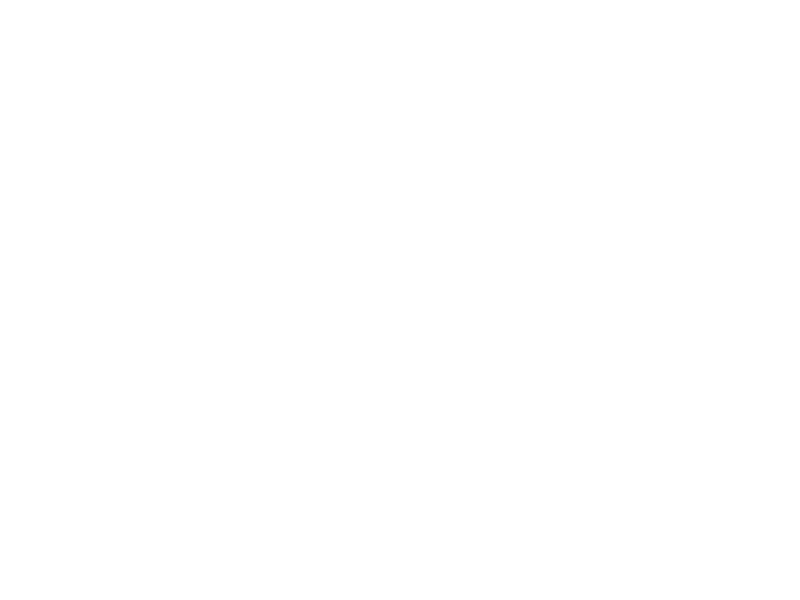

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.figure()

from scipy.cluster.hierarchy import linkage, dendrogram

# Preparing linkage matrix
linkage_matrix = linkage(std_cereals, method='ward',metric='euclidean')


fig, axs = plt.subplots()
dendrogram(linkage_matrix,labels=cereal_label.to_numpy())
plt.tight_layout()   #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

## Training model and return class labels
agg_clusters = agg_clust.fit_predict(std_cereals)

## Label - Cluster
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result.head(15)

,label,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0
70,Total_Raisin_Bran (3 - 28.59),0
51,Oatmeal_Raisin_Crisp (3 - 30.45),0
7,Basic_4 (3 - 37.04),0
39,Just_Right_Fruit_&_Nut (3 - 36.47),0
52,Post_Nat._Raisin_Bran (3 - 37.84),0


In [20]:
agg_clusters

array([3, 0, 3, 3, 4, 4, 4, 0, 2, 2, 4, 2, 4, 2, 4, 1, 1, 4, 4, 2, 2, 1,
       4, 1, 4, 4, 2, 0, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 0, 1, 2, 4, 2,
       0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 5, 5, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 0, 1, 1, 4, 2, 2, 4], dtype=int64)

## K-Means Clustering
**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids 

#### Simple Example to implement KMeans clustering algorithm using sklearn.cluster

In [21]:
from sklearn.cluster import KMeans

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

print(X)
Y = pd.DataFrame(X,columns=['A','B'])
print("\n")
print(Y)

kmeans = KMeans(n_clusters=2, random_state=2).fit(X)
kmeans.labels_

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


   A  B
0  1  2
1  1  4
2  1  0
3  4  2
4  4  4
5  4  0


array([1, 1, 1, 0, 0, 0])

In [22]:
kmeans.cluster_centers_

array([[4., 2.],
       [1., 2.]])

In [23]:
kmeans.predict([[0, 0], [4, 4]])    #Adding new observations

array([1, 0])

In [24]:
kmeans.inertia_                     #Terminology which tells about WithInSumOfSquare(WSS)

16.0

In [25]:
from sklearn.cluster import KMeans

kmeans_object = KMeans(n_clusters=5, random_state=1240)

kmeans_object.fit(std_cereals)
kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),2
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),2


In [26]:
kmeans_object.labels_

array([4, 2, 4, 4, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 1,
       2, 1, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 3,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 3, 3, 2, 3, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 2])

### Inspecting cluster centroids to understand average statistics of each cluster

In [27]:
# inverse_transform is used to Scale back the data to the original representation
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),columns=cereals.columns)   ## Using inverse_transform to retrive actual values from standardized data
cluster_centroids.to_csv("best_kmeans_cluster_centroids.csv")  #to write output to any file(use .to_csv)
cluster_centroids

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,135.000000,3.166667,1.666667,180.416667,3.541667,15.625000,10.916667,172.083333,37.500000,1.287500,0.758333
1,105.294118,2.705882,0.529412,237.058824,1.176471,19.294118,3.000000,62.352941,42.647059,1.000000,1.002941
2,108.529412,2.058824,1.294118,161.029412,1.397059,12.661765,9.411765,74.078431,24.264706,1.000000,0.782353
3,85.454545,2.727273,0.272727,8.636364,2.063636,15.800239,2.547847,93.060606,9.090909,0.893636,0.846364
4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000000,0.386667


In [28]:
wss= {}
for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,n_jobs=2,random_state=1000,verbose=0).fit(std_cereals)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


In [29]:
wss

{1: 846.9999999999999,
 2: 686.1907115207284,
 3: 584.7237118058638,
 4: 489.2454641375005,
 5: 411.6473261000441,
 6: 354.24493350305426,
 7: 314.03022959743225,
 8: 276.2790231881626,
 9: 247.42481441736913,
 10: 229.8360075538547,
 11: 207.5189681359663,
 12: 188.17502321694695,
 13: 168.9885864397974,
 14: 153.09943358938295,
 15: 141.726492321529,
 16: 134.13081471557894,
 17: 129.23199501805345,
 18: 122.36999466018688,
 19: 116.59112466958399,
 20: 113.5074076192916}

In [30]:
wss.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [31]:
wss.values()

dict_values([846.9999999999999, 686.1907115207284, 584.7237118058638, 489.2454641375005, 411.6473261000441, 354.24493350305426, 314.03022959743225, 276.2790231881626, 247.42481441736913, 229.8360075538547, 207.5189681359663, 188.17502321694695, 168.9885864397974, 153.09943358938295, 141.726492321529, 134.13081471557894, 129.23199501805345, 122.36999466018688, 116.59112466958399, 113.5074076192916])

In [32]:
list(wss.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

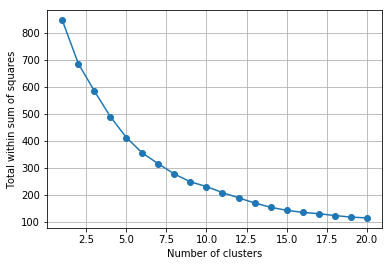

In [33]:
import matplotlib.pyplot as plt
plt.figure()
# %matplotlib notebook

plt.plot(wss.keys(),wss.values(),marker='o')

# plt.plot(list(wss.keys()),list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()


### How to select best K value for K-Means -> Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

Automatically created module for IPython interactive environment


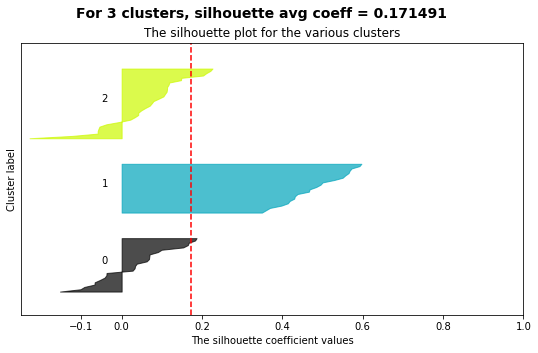

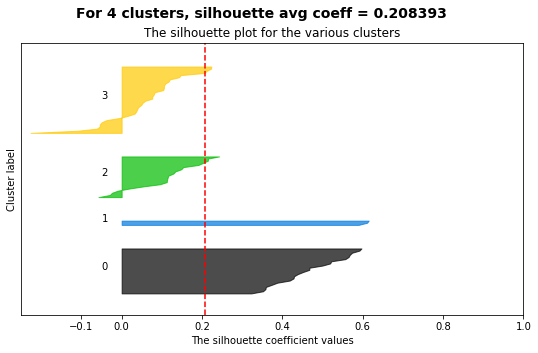

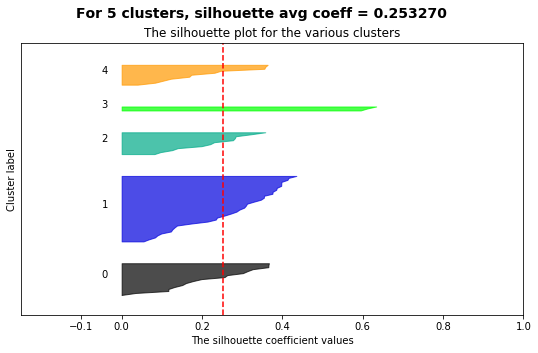

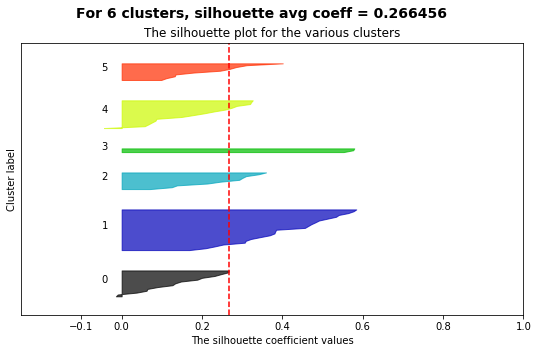

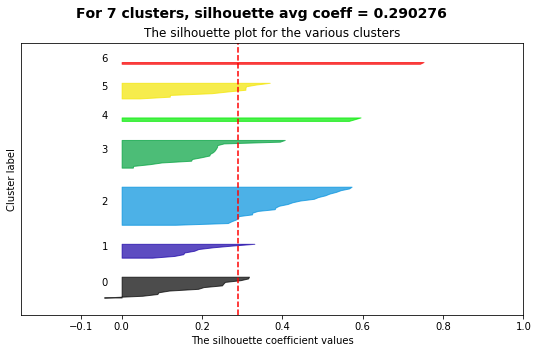

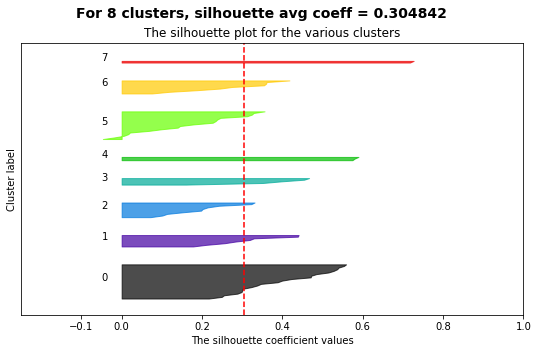

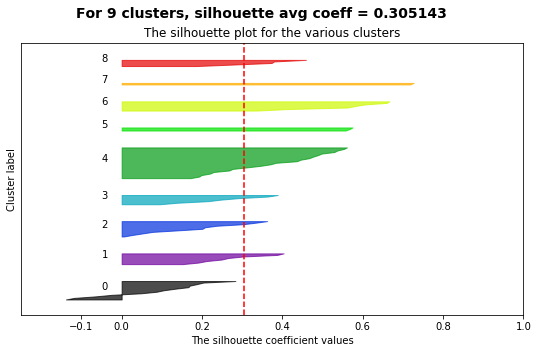

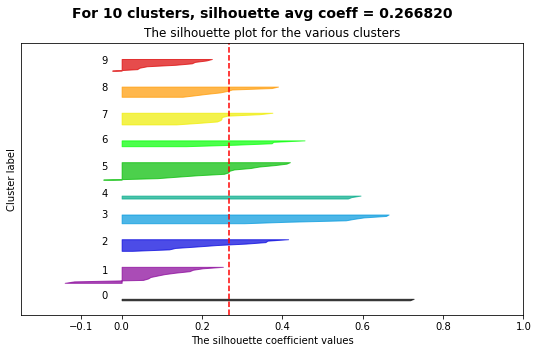

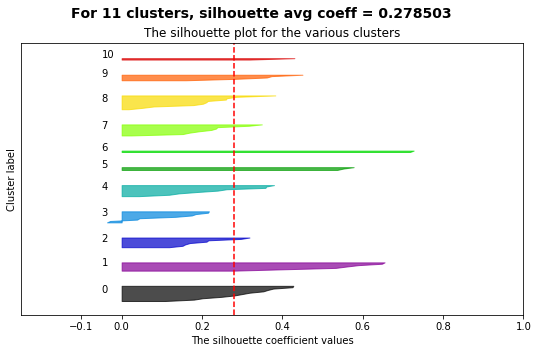

In [34]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from __future__ import print_function

# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plt.figure()

print(__doc__)

### Just change this to your dataframe
X_matrix = std_cereals.to_numpy()

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, +1 
    
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

### Note - Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8-9

In [35]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [36]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),4
1,100%_Natural_Bran (3 - 33.98),0
2,All-Bran (3 - 59.43),4
3,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,Almond_Delight (3 - 34.38),1


### Add Cluster Labels to Original Data

In [37]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),4
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),0
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),4
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),4
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),1
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),1
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),1
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),7
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),2
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),2


In [38]:
final_cluster_data.shape

(77, 13)

In [39]:
final_cluster_data.kmeans_cluster.value_counts()

1    21
2    12
7    10
5    10
0     8
6     7
3     6
4     3
Name: kmeans_cluster, dtype: int64

### Post-Process Clusters 

In [40]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
analysis

,kmeans_cluster,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,0,107.500000,3.500000,2.500000,99.375000,2.525000,11.500000,6.571429,119.375000,18.75,1.000000,0.583750
1,1,110.952381,1.476190,1.047619,166.190476,0.547619,12.547619,11.380952,45.250000,25.00,1.000000,0.875238
2,2,100.833333,3.250000,0.666667,208.333333,2.625000,15.791667,4.333333,102.083333,25.00,1.000000,0.824167
3,3,116.666667,2.666667,0.833333,208.333333,1.833333,18.166667,6.333333,95.833333,100.00,1.133333,0.958333
4,4,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.00,1.000000,0.386667
5,5,84.000000,2.500000,0.100000,9.500000,2.000000,15.900000,2.100000,90.555556,10.00,0.883000,0.864000
6,6,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.00,1.000000,1.054286
7,7,134.000000,3.200000,1.800000,180.500000,3.650000,15.250000,10.800000,174.000000,25.00,1.265000,0.735000


In [41]:
final_cluster_data.kmeans_cluster.value_counts()

1    21
2    12
7    10
5    10
0     8
6     7
3     6
4     3
Name: kmeans_cluster, dtype: int64

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html